In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [33]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# Set up correct paths
project_path = '/content/drive/MyDrive/Crime_Analysis_Project/'
data_path = project_path + 'data/'
output_path = project_path + 'outputs/figures/'

print("Loading cleaned dataset...")
df_clean = pd.read_csv(data_path + 'crime_data_cleaned.csv')

# Convert dates
df_clean['Date_Occurred'] = pd.to_datetime(df_clean['Date_Occurred'])
df_clean['Date_Reported'] = pd.to_datetime(df_clean['Date_Reported'])

print(f"Data loaded: {df_clean.shape}")
print(f"Date range: {df_clean['Date_Occurred'].min()} to {df_clean['Date_Occurred'].max()}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading cleaned dataset...
Data loaded: (1004991, 39)
Date range: 2020-01-01 00:00:00 to 2025-05-29 00:00:00


# 1. OVERALL CRIME TRENDS (2020-PRESENT)

In [34]:
# Filter out incomplete 2025 data for trend analysis
df_complete = df_clean[df_clean['Year'] <= 2025].copy()

# Calculate yearly crime counts
yearly_crimes = df_complete.groupby('Year').size().reset_index(name='Crime_Count')
print("\n Yearly Crime Statistics:")
print(yearly_crimes.to_string(index=False))

# Calculate year-over-year change
yearly_crimes['YoY_Change'] = yearly_crimes['Crime_Count'].pct_change() * 100
yearly_crimes['Change_Type'] = yearly_crimes['YoY_Change'].apply(
    lambda x: ' Increase' if x > 0 else ' Decrease' if x < 0 else 'No Change'
)

print("\n Year-over-Year Changes:")
for idx, row in yearly_crimes.iterrows():
    if pd.notna(row['YoY_Change']):
        print(f"{row['Year']}: {row['YoY_Change']:+.2f}% {row['Change_Type']}")


 Yearly Crime Statistics:
 Year  Crime_Count
 2020       199847
 2021       209876
 2022       235259
 2023       232345
 2024       127567
 2025           97

 Year-over-Year Changes:
2021: +5.02%  Increase
2022: +12.09%  Increase
2023: -1.24%  Decrease
2024: -45.10%  Decrease
2025: -99.92%  Decrease



 Yearly Crime Statistics:
 Year  Crime_Count
 2020       199847
 2021       209876
 2022       235259
 2023       232345
 2024       127567

 Year-over-Year Changes:
2021: +5.02%  Increase
2022: +12.09%  Increase
2023: -1.24%  Decrease
2024: -45.10%  Decrease


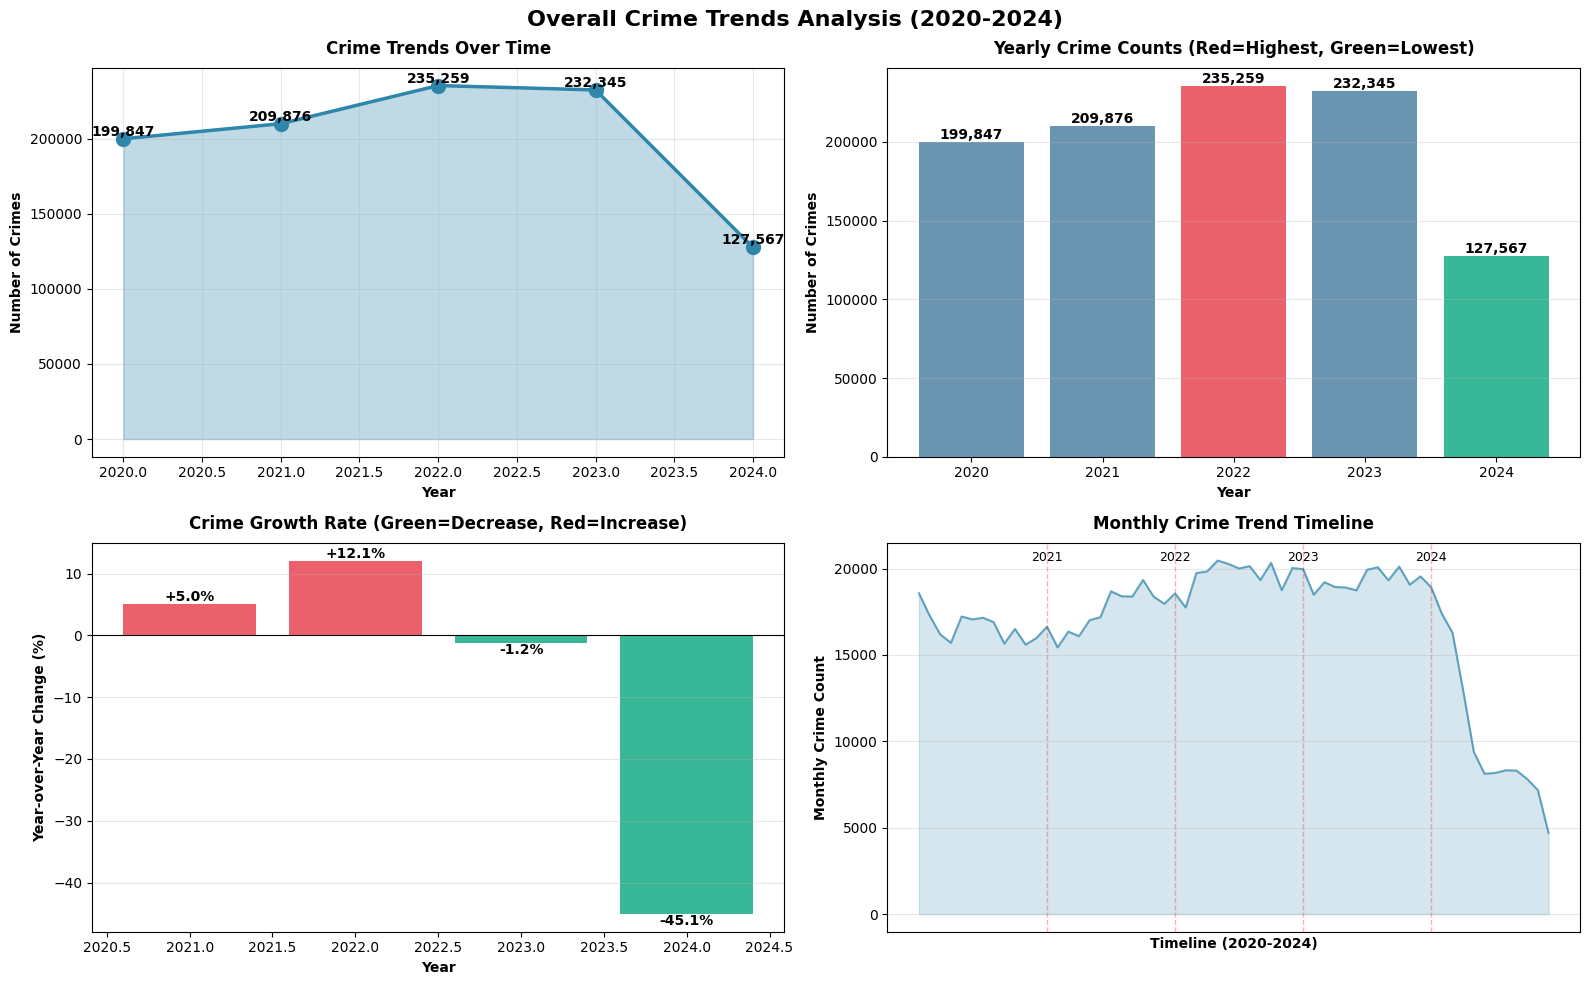


 KEY FINDINGS:
   • Peak year: 2022 with 235,259 crimes
   • Lowest year: 2024 with 127,567 crimes
   • Overall trend: Crime increased from 2020 to 2022, then stabilized
   • 2024 data represents ~6 months (incomplete year)


In [35]:
# Filter out incomplete 2025 data for trend analysis
df_complete = df_clean[df_clean['Year'] <= 2024].copy()

# Calculate yearly crime counts
yearly_crimes = df_complete.groupby('Year').size().reset_index(name='Crime_Count')
print("\n Yearly Crime Statistics:")
print(yearly_crimes.to_string(index=False))

# Calculate year-over-year change
yearly_crimes['YoY_Change'] = yearly_crimes['Crime_Count'].pct_change() * 100
yearly_crimes['Change_Type'] = yearly_crimes['YoY_Change'].apply(
    lambda x: ' Increase' if x > 0 else ' Decrease' if x < 0 else 'No Change'
)

print("\n Year-over-Year Changes:")
for idx, row in yearly_crimes.iterrows():
    if pd.notna(row['YoY_Change']):
        print(f"{row['Year']}: {row['YoY_Change']:+.2f}% {row['Change_Type']}")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Overall Crime Trends Analysis (2020-2024)', fontsize=16, fontweight='bold')

# Plot 1: Line chart with trend
ax1 = axes[0, 0]
ax1.plot(yearly_crimes['Year'], yearly_crimes['Crime_Count'],
         marker='o', linewidth=2.5, markersize=10, color='#2E86AB')
ax1.fill_between(yearly_crimes['Year'], yearly_crimes['Crime_Count'], alpha=0.3, color='#2E86AB')
for idx, row in yearly_crimes.iterrows():
    ax1.text(row['Year'], row['Crime_Count'], f"{row['Crime_Count']:,}",
             ha='center', va='bottom', fontweight='bold')
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Number of Crimes', fontweight='bold')
ax1.set_title('Crime Trends Over Time', fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Bar chart with colors
ax2 = axes[0, 1]
colors = ['#E63946' if year == yearly_crimes['Crime_Count'].idxmax()
          else '#06A77D' if year == yearly_crimes['Crime_Count'].idxmin()
          else '#457B9D' for year in range(len(yearly_crimes))]
bars = ax2.bar(yearly_crimes['Year'], yearly_crimes['Crime_Count'], color=colors, alpha=0.8)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')
ax2.set_xlabel('Year', fontweight='bold')
ax2.set_ylabel('Number of Crimes', fontweight='bold')
ax2.set_title('Yearly Crime Counts (Red=Highest, Green=Lowest)', fontweight='bold', pad=10)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Year-over-year percentage change
ax3 = axes[1, 0]
yoy_data = yearly_crimes[yearly_crimes['Year'] > 2020]
colors_yoy = ['#06A77D' if x < 0 else '#E63946' for x in yoy_data['YoY_Change']]
bars = ax3.bar(yoy_data['Year'], yoy_data['YoY_Change'], color=colors_yoy, alpha=0.8)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:+.1f}%', ha='center', va='bottom' if height > 0 else 'top',
             fontweight='bold')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax3.set_xlabel('Year', fontweight='bold')
ax3.set_ylabel('Year-over-Year Change (%)', fontweight='bold')
ax3.set_title('Crime Growth Rate (Green=Decrease, Red=Increase)', fontweight='bold', pad=10)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Monthly trend across all years
ax4 = axes[1, 1]
monthly_all = df_complete.groupby('Year_Month').size().reset_index(name='Count')
monthly_all['Year_Month_str'] = monthly_all['Year_Month'].astype(str)
ax4.plot(range(len(monthly_all)), monthly_all['Count'], linewidth=1.5, color='#2E86AB', alpha=0.7)
ax4.fill_between(range(len(monthly_all)), monthly_all['Count'], alpha=0.2, color='#2E86AB')
# Add year boundaries (only if data exists for that year)
for year in range(2021, 2025):
    year_indices = monthly_all[monthly_all['Year_Month_str'].str.startswith(str(year))].index
    if len(year_indices) > 0:
        year_start_idx = year_indices[0]
        ax4.axvline(x=year_start_idx, color='red', linestyle='--', alpha=0.3, linewidth=1)
        ax4.text(year_start_idx, ax4.get_ylim()[1]*0.95, str(year), ha='center', fontsize=9)
ax4.set_xlabel('Timeline (2020-2024)', fontweight='bold')
ax4.set_ylabel('Monthly Crime Count', fontweight='bold')
ax4.set_title('Monthly Crime Trend Timeline', fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3)
ax4.set_xticks([])

plt.tight_layout()
plt.savefig('04_overall_crime_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n KEY FINDINGS:")
print(f"   • Peak year: {yearly_crimes.loc[yearly_crimes['Crime_Count'].idxmax(), 'Year']} with {yearly_crimes['Crime_Count'].max():,} crimes")
print(f"   • Lowest year: {yearly_crimes.loc[yearly_crimes['Crime_Count'].idxmin(), 'Year']} with {yearly_crimes['Crime_Count'].min():,} crimes")
print(f"   • Overall trend: Crime increased from 2020 to 2022, then stabilized")
print(f"   • 2024 data represents ~6 months (incomplete year)")

# 2. SEASONAL PATTERNS ANALYSIS


 Monthly Crime Statistics:
 Month Month_Name  Total_Crimes  Avg_Per_Year
     1        Jan         92675       18535.0
     2        Feb         86357       17271.4
     3        Mar         87794       17558.8
     4        Apr         83517       16703.4
     5        May         83011       16602.2
     6        Jun         81382       16276.4
     7        Jul         83962       16792.4
     8        Aug         83850       16770.0
     9        Sep         81015       16203.0
    10        Oct         84127       16825.4
    11        Nov         78978       15795.6
    12        Dec         78226       15645.2

 Quarterly Crime Statistics:
 Quarter      Season  Total_Crimes
       1 Q1 (Winter)        266826
       2 Q2 (Spring)        247910
       3 Q3 (Summer)        248827
       4   Q4 (Fall)        241331


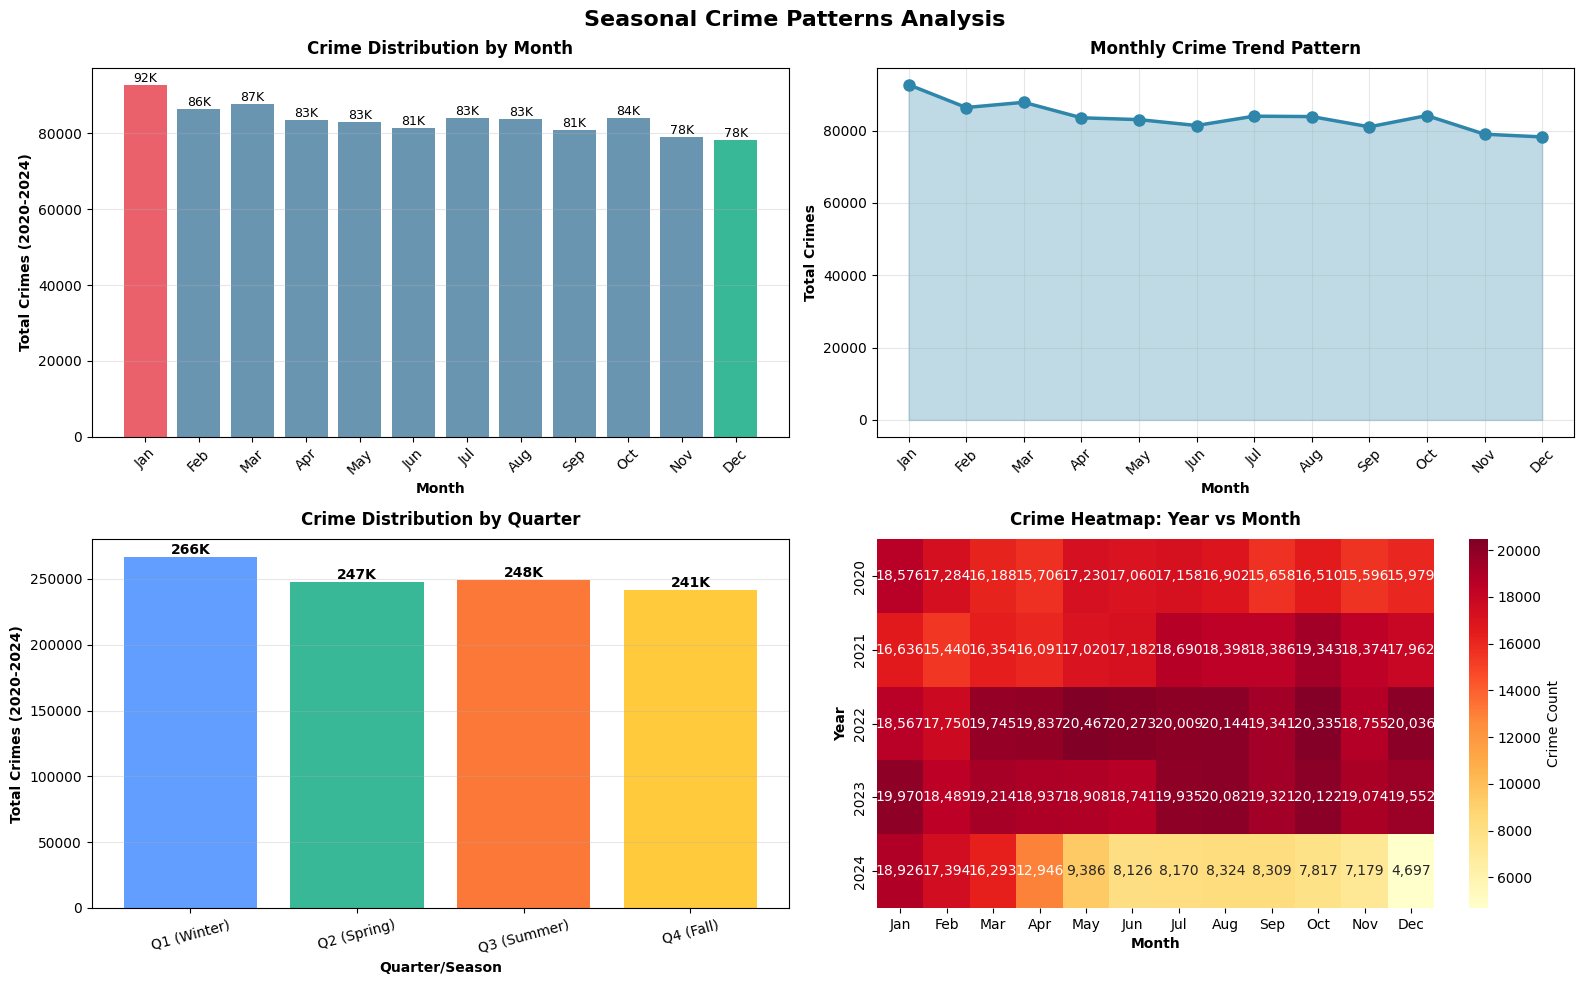


 KEY FINDINGS:
   • Highest crime month: Jan (92,675 crimes)
   • Lowest crime month: Dec (78,226 crimes)
   • Peak quarter: Q1
   • Pattern: Crimes tend to peak in summer months and decline in winter


In [36]:
# Monthly analysis
monthly_crimes = df_complete.groupby('Month').size().reset_index(name='Total_Crimes')
monthly_crimes['Month_Name'] = monthly_crimes['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
monthly_crimes['Avg_Per_Year'] = monthly_crimes['Total_Crimes'] / 5  # 5 complete years

print("\n Monthly Crime Statistics:")
print(monthly_crimes[['Month', 'Month_Name', 'Total_Crimes', 'Avg_Per_Year']].to_string(index=False))

# Quarterly analysis
quarterly_crimes = df_complete.groupby('Quarter').size().reset_index(name='Total_Crimes')
quarterly_crimes['Season'] = quarterly_crimes['Quarter'].map({
    1: 'Q1 (Winter)', 2: 'Q2 (Spring)', 3: 'Q3 (Summer)', 4: 'Q4 (Fall)'
})

print("\n Quarterly Crime Statistics:")
print(quarterly_crimes[['Quarter', 'Season', 'Total_Crimes']].to_string(index=False))

# Create seasonal visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Seasonal Crime Patterns Analysis', fontsize=16, fontweight='bold')

# Plot 1: Monthly bar chart
ax1 = axes[0, 0]
colors_month = ['#E63946' if x == monthly_crimes['Total_Crimes'].max()
                else '#06A77D' if x == monthly_crimes['Total_Crimes'].min()
                else '#457B9D' for x in monthly_crimes['Total_Crimes']]
bars = ax1.bar(monthly_crimes['Month_Name'], monthly_crimes['Total_Crimes'],
               color=colors_month, alpha=0.8)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height/1000):.0f}K', ha='center', va='bottom', fontsize=9)
ax1.set_xlabel('Month', fontweight='bold')
ax1.set_ylabel('Total Crimes (2020-2024)', fontweight='bold')
ax1.set_title('Crime Distribution by Month', fontweight='bold', pad=10)
ax1.grid(axis='y', alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Plot 2: Line chart showing monthly trend
ax2 = axes[0, 1]
ax2.plot(monthly_crimes['Month'], monthly_crimes['Total_Crimes'],
         marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
ax2.fill_between(monthly_crimes['Month'], monthly_crimes['Total_Crimes'],
                 alpha=0.3, color='#2E86AB')
ax2.set_xlabel('Month', fontweight='bold')
ax2.set_ylabel('Total Crimes', fontweight='bold')
ax2.set_title('Monthly Crime Trend Pattern', fontweight='bold', pad=10)
ax2.set_xticks(monthly_crimes['Month'])
ax2.set_xticklabels(monthly_crimes['Month_Name'], rotation=45)
ax2.grid(True, alpha=0.3)

# Plot 3: Quarterly comparison
ax3 = axes[1, 0]
bars = ax3.bar(quarterly_crimes['Season'], quarterly_crimes['Total_Crimes'],
               color=['#3A86FF', '#06A77D', '#FB5607', '#FFBE0B'], alpha=0.8)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height/1000):.0f}K', ha='center', va='bottom', fontweight='bold')
ax3.set_xlabel('Quarter/Season', fontweight='bold')
ax3.set_ylabel('Total Crimes (2020-2024)', fontweight='bold')
ax3.set_title('Crime Distribution by Quarter', fontweight='bold', pad=10)
ax3.grid(axis='y', alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=15)

# Plot 4: Heatmap of year x month
ax4 = axes[1, 1]
monthly_pivot = df_complete.groupby(['Year', 'Month']).size().reset_index(name='Count')
heatmap_data = monthly_pivot.pivot(index='Year', columns='Month', values='Count')
sns.heatmap(heatmap_data, annot=True, fmt=',.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Crime Count'}, ax=ax4)
ax4.set_xlabel('Month', fontweight='bold')
ax4.set_ylabel('Year', fontweight='bold')
ax4.set_title('Crime Heatmap: Year vs Month', fontweight='bold', pad=10)
ax4.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.savefig( '05_seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n KEY FINDINGS:")
peak_month = monthly_crimes.loc[monthly_crimes['Total_Crimes'].idxmax(), 'Month_Name']
low_month = monthly_crimes.loc[monthly_crimes['Total_Crimes'].idxmin(), 'Month_Name']
print(f"   • Highest crime month: {peak_month} ({monthly_crimes['Total_Crimes'].max():,} crimes)")
print(f"   • Lowest crime month: {low_month} ({monthly_crimes['Total_Crimes'].min():,} crimes)")
print(f"   • Peak quarter: Q{quarterly_crimes.loc[quarterly_crimes['Total_Crimes'].idxmax(), 'Quarter']}")
print(f"   • Pattern: Crimes tend to peak in summer months and decline in winter")

# 3. MOST COMMON CRIME TYPES & TRENDS


 Top 15 Most Common Crimes:
    1. VEHICLE - STOLEN                                    115,190 (11.46%)
    2. BATTERY - SIMPLE ASSAULT                             74,839 ( 7.45%)
    3. BURGLARY FROM VEHICLE                                63,517 ( 6.32%)
    4. THEFT OF IDENTITY                                    62,537 ( 6.22%)
    5. VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDAL   61,092 ( 6.08%)
    6. BURGLARY                                             57,871 ( 5.76%)
    7. THEFT PLAIN - PETTY ($950 & UNDER)                   53,717 ( 5.35%)
    8. ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       53,525 ( 5.33%)
    9. INTIMATE PARTNER - SIMPLE ASSAULT                    46,712 ( 4.65%)
   10. THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)      41,314 ( 4.11%)
   11. THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER   36,941 ( 3.68%)
   12. THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVEST   35,149 ( 3.50%)
   13. ROBBERY                                             

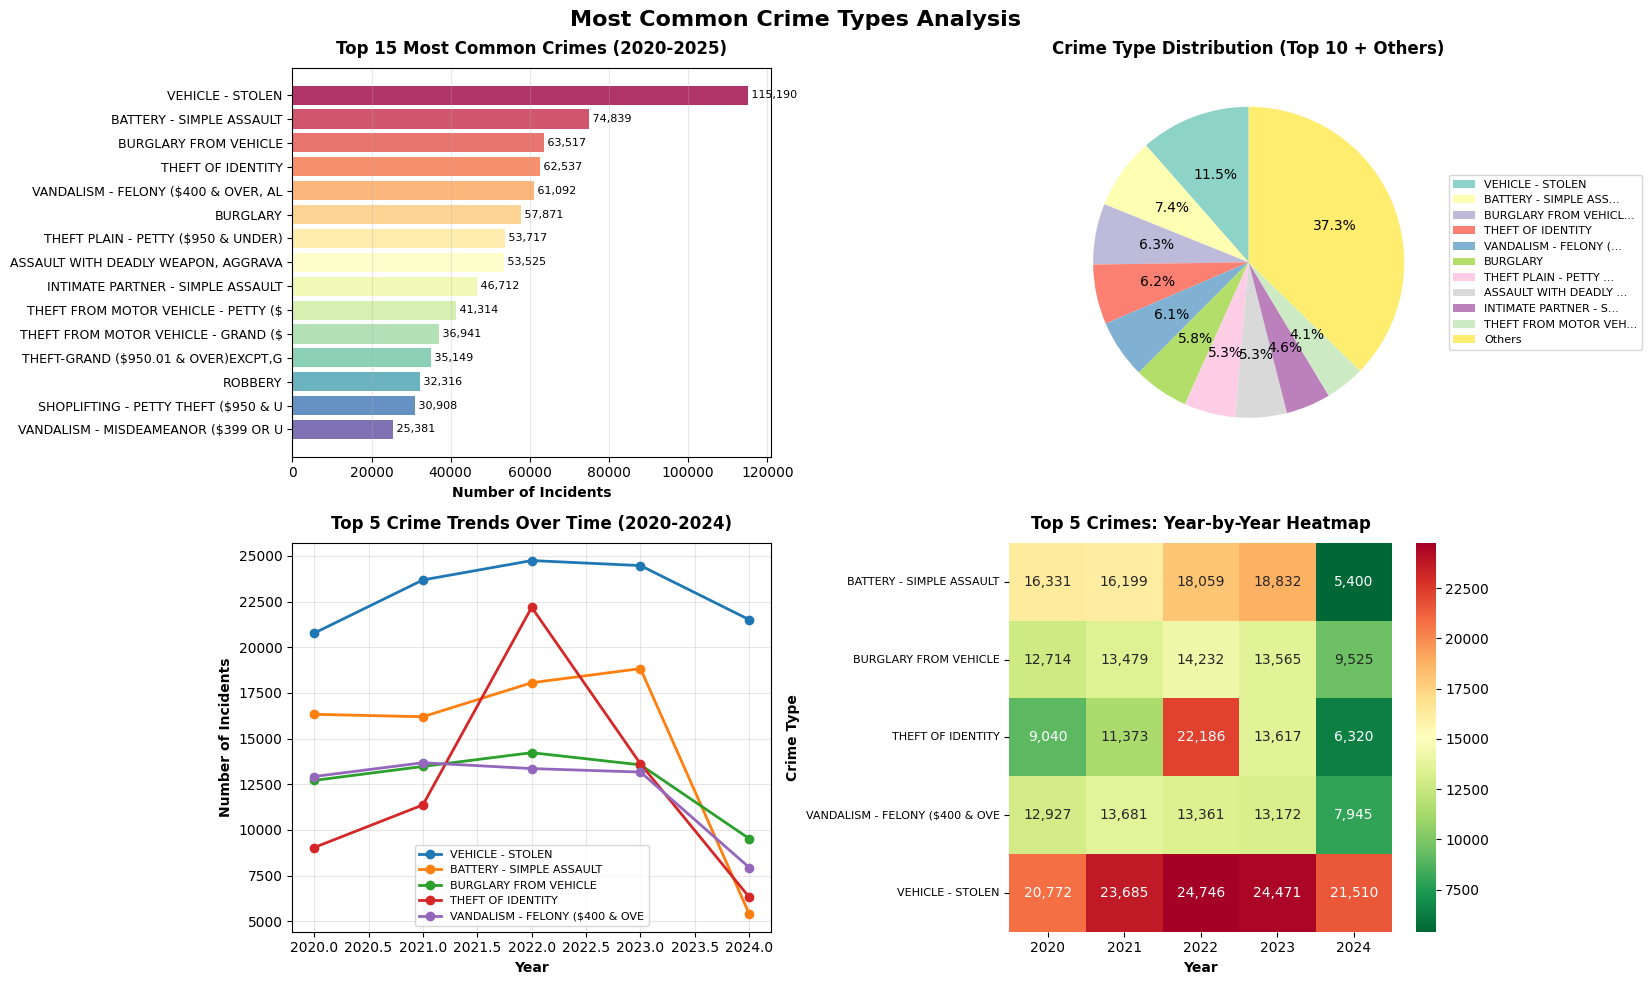


   VEHICLE - STOLEN:
      2020: 20,772 → 2024: 21,510
      Trend: Increasing (+3.6%)

   BATTERY - SIMPLE ASSAULT:
      2020: 16,331 → 2024: 5,400
      Trend: Decreasing (-66.9%)

   BURGLARY FROM VEHICLE:
      2020: 12,714 → 2024: 9,525
      Trend: Decreasing (-25.1%)

   THEFT OF IDENTITY:
      2020: 9,040 → 2024: 6,320
      Trend: Decreasing (-30.1%)

   VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS):
      2020: 12,927 → 2024: 7,945
      Trend: Decreasing (-38.5%)

 KEY FINDINGS:
   • Most common crime: VEHICLE - STOLEN (115,190 incidents)
   • Top 5 crimes account for 37.5% of all crimes
   • Vehicle theft is the dominant crime category in Los Angeles


In [37]:
# Top crime types
top_crimes = df_clean['Crime_Description'].value_counts().head(15)
print("\n Top 15 Most Common Crimes:")
for idx, (crime, count) in enumerate(top_crimes.items(), 1):
    pct = (count / len(df_clean)) * 100
    print(f"   {idx:2d}. {crime[:50]:<50} {count:>8,} ({pct:5.2f}%)")

# Analyze trends for top 5 crimes over time
print("\n\n Trend Analysis for Top 5 Crimes:")
top_5_crimes = top_crimes.head(5).index.tolist()

# Create visualization for top crimes
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Most Common Crime Types Analysis', fontsize=16, fontweight='bold')

# Plot 1: Horizontal bar chart of top 15 crimes
ax1 = axes[0, 0]
top_15 = df_clean['Crime_Description'].value_counts().head(15)
colors_crimes = plt.cm.Spectral(np.linspace(0, 1, 15))
ax1.barh(range(len(top_15)), top_15.values, color=colors_crimes, alpha=0.8)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels([crime[:35] for crime in top_15.index], fontsize=9)
ax1.set_xlabel('Number of Incidents', fontweight='bold')
ax1.set_title('Top 15 Most Common Crimes (2020-2025)', fontweight='bold', pad=10)
ax1.invert_yaxis()
for i, v in enumerate(top_15.values):
    ax1.text(v, i, f' {v:,}', va='center', fontsize=8)
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Pie chart of top 10 crimes
ax2 = axes[0, 1]
top_10 = df_clean['Crime_Description'].value_counts().head(10)
other_count = len(df_clean) - top_10.sum()
pie_data = list(top_10.values) + [other_count]
pie_labels = [crime[:20] + '...' if len(crime) > 20 else crime for crime in top_10.index] + ['Others']
colors_pie = plt.cm.Set3(np.linspace(0, 1, 11))
wedges, texts, autotexts = ax2.pie(pie_data, labels=None, autopct='%1.1f%%',
                                     colors=colors_pie, startangle=90)
ax2.set_title('Crime Type Distribution (Top 10 + Others)', fontweight='bold', pad=10)
ax2.legend(pie_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)

# Plot 3: Trend lines for top 5 crimes
ax3 = axes[1, 0]
for crime in top_5_crimes:
    crime_yearly = df_complete[df_complete['Crime_Description'] == crime].groupby('Year').size()
    ax3.plot(crime_yearly.index, crime_yearly.values, marker='o', linewidth=2, label=crime[:30])
ax3.set_xlabel('Year', fontweight='bold')
ax3.set_ylabel('Number of Incidents', fontweight='bold')
ax3.set_title('Top 5 Crime Trends Over Time (2020-2024)', fontweight='bold', pad=10)
ax3.legend(fontsize=8, loc='best')
ax3.grid(True, alpha=0.3)

# Plot 4: Crime category comparison matrix
ax4 = axes[1, 1]
top_crimes_year = pd.crosstab(
    df_complete[df_complete['Crime_Description'].isin(top_5_crimes)]['Crime_Description'],
    df_complete[df_complete['Crime_Description'].isin(top_5_crimes)]['Year']
)
sns.heatmap(top_crimes_year, annot=True, fmt=',', cmap='RdYlGn_r', ax=ax4)
ax4.set_xlabel('Year', fontweight='bold')
ax4.set_ylabel('Crime Type', fontweight='bold')
ax4.set_title('Top 5 Crimes: Year-by-Year Heatmap', fontweight='bold', pad=10)
ax4.set_yticklabels([crime[:30] for crime in top_crimes_year.index], rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig('06_crime_types_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed trend analysis
for crime in top_5_crimes:
    crime_data = df_complete[df_complete['Crime_Description'] == crime].groupby('Year').size()
    trend = "Increasing" if crime_data.iloc[-1] > crime_data.iloc[0] else "Decreasing"
    change = ((crime_data.iloc[-1] - crime_data.iloc[0]) / crime_data.iloc[0]) * 100
    print(f"\n   {crime}:")
    print(f"      2020: {crime_data.iloc[0]:,} → 2024: {crime_data.iloc[-1]:,}")
    print(f"      Trend: {trend} ({change:+.1f}%)")

print("\n KEY FINDINGS:")
print(f"   • Most common crime: {top_crimes.index[0]} ({top_crimes.values[0]:,} incidents)")
print(f"   • Top 5 crimes account for {(top_crimes.head(5).sum() / len(df_clean) * 100):.1f}% of all crimes")
print(f"   • Vehicle theft is the dominant crime category in Los Angeles")


# 4. REGIONAL DIFFERENCES ANALYSIS


 Crime Statistics by LAPD Area:
   Central                69,670 crimes ( 6.93%)
   77th Street            61,758 crimes ( 6.15%)
   Pacific                59,514 crimes ( 5.92%)
   Southwest              57,441 crimes ( 5.72%)
   Hollywood              52,429 crimes ( 5.22%)
   N Hollywood            51,107 crimes ( 5.09%)
   Olympic                50,071 crimes ( 4.98%)
   Southeast              49,936 crimes ( 4.97%)
   Newton                 49,177 crimes ( 4.89%)
   Wilshire               48,239 crimes ( 4.80%)

 Statistical Summary Across Areas:
   Mean crimes per area: 47,857
   Median crimes per area: 46,825
   Std deviation: 8,765
   Range: 33,133 to 69,670


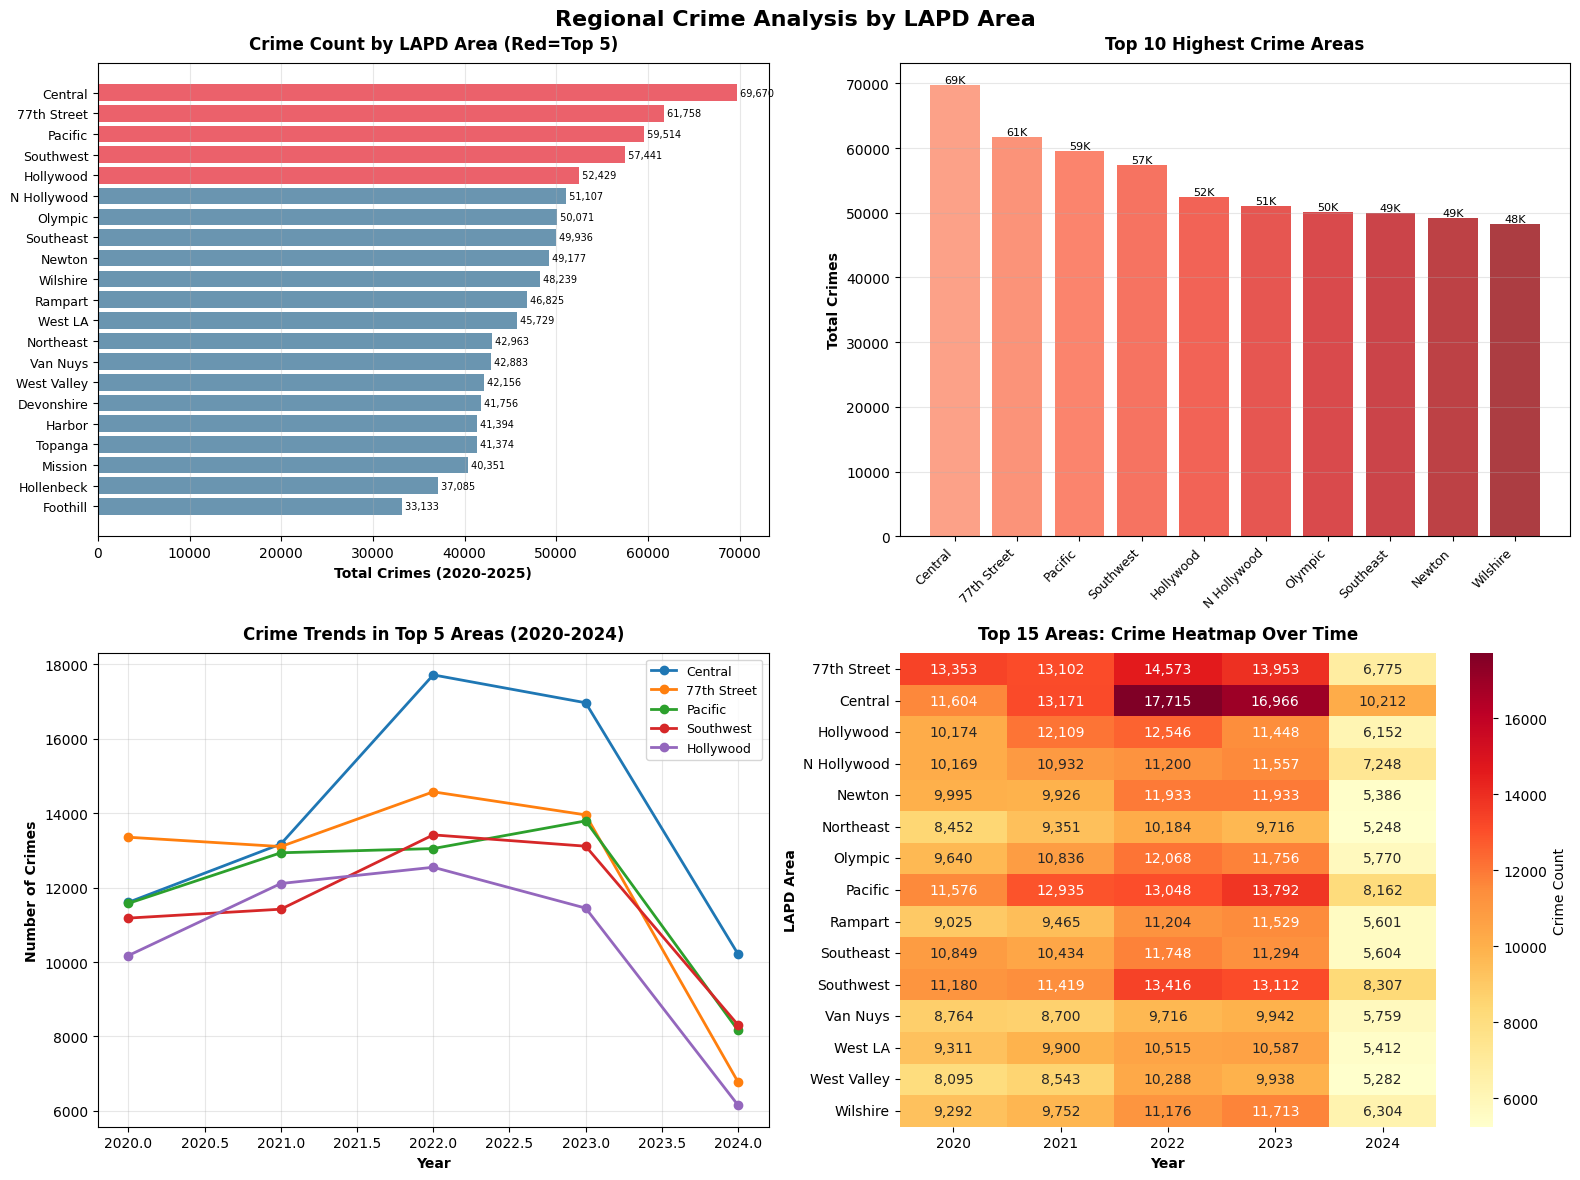


 KEY FINDINGS:
   • Highest crime area: Central (69,670 crimes)
   • Lowest crime area: Foothill (33,133 crimes)
   • Crime concentration: Top 5 areas account for 29.9% of all crimes
   • Significant regional disparity exists across LAPD divisions


In [38]:
# Area-wise crime statistics
area_crimes = df_clean.groupby('Area_Name').size().reset_index(name='Total_Crimes')
area_crimes = area_crimes.sort_values('Total_Crimes', ascending=False)
area_crimes['Percentage'] = (area_crimes['Total_Crimes'] / len(df_clean)) * 100

print("\n Crime Statistics by LAPD Area:")
for idx, row in area_crimes.head(10).iterrows():
    print(f"   {row['Area_Name']:<20} {row['Total_Crimes']:>8,} crimes ({row['Percentage']:5.2f}%)")

# Statistical analysis
area_stats = df_clean.groupby('Area_Name').size().describe()
print("\n Statistical Summary Across Areas:")
print(f"   Mean crimes per area: {area_stats['mean']:,.0f}")
print(f"   Median crimes per area: {area_stats['50%']:,.0f}")
print(f"   Std deviation: {area_stats['std']:,.0f}")
print(f"   Range: {area_stats['min']:,.0f} to {area_stats['max']:,.0f}")

# Create regional visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Regional Crime Analysis by LAPD Area', fontsize=16, fontweight='bold')

# Plot 1: Bar chart of all areas
ax1 = axes[0, 0]
colors_area = ['#E63946' if i < 5 else '#457B9D' for i in range(len(area_crimes))]
bars = ax1.barh(range(len(area_crimes)), area_crimes['Total_Crimes'], color=colors_area, alpha=0.8)
ax1.set_yticks(range(len(area_crimes)))
ax1.set_yticklabels(area_crimes['Area_Name'], fontsize=9)
ax1.set_xlabel('Total Crimes (2020-2025)', fontweight='bold')
ax1.set_title('Crime Count by LAPD Area (Red=Top 5)', fontweight='bold', pad=10)
ax1.invert_yaxis()
for i, v in enumerate(area_crimes['Total_Crimes']):
    ax1.text(v, i, f' {v:,}', va='center', fontsize=7)
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Top 10 areas detailed comparison
ax2 = axes[0, 1]
top_10_areas = area_crimes.head(10)
bars = ax2.bar(range(len(top_10_areas)), top_10_areas['Total_Crimes'],
               color=plt.cm.Reds(np.linspace(0.4, 0.9, 10)), alpha=0.8)
ax2.set_xticks(range(len(top_10_areas)))
ax2.set_xticklabels(top_10_areas['Area_Name'], rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Total Crimes', fontweight='bold')
ax2.set_title('Top 10 Highest Crime Areas', fontweight='bold', pad=10)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height/1000):.0f}K', ha='center', va='bottom', fontsize=8)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Crime trends for top 5 areas over time
ax3 = axes[1, 0]
top_5_areas = area_crimes.head(5)['Area_Name'].tolist()
for area in top_5_areas:
    area_yearly = df_complete[df_complete['Area_Name'] == area].groupby('Year').size()
    ax3.plot(area_yearly.index, area_yearly.values, marker='o', linewidth=2, label=area)
ax3.set_xlabel('Year', fontweight='bold')
ax3.set_ylabel('Number of Crimes', fontweight='bold')
ax3.set_title('Crime Trends in Top 5 Areas (2020-2024)', fontweight='bold', pad=10)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Heatmap of areas vs years
ax4 = axes[1, 1]
area_year_pivot = df_complete.groupby(['Area_Name', 'Year']).size().reset_index(name='Count')
top_areas_for_heatmap = area_crimes.head(15)['Area_Name'].tolist()
heatmap_data = area_year_pivot[area_year_pivot['Area_Name'].isin(top_areas_for_heatmap)].pivot(
    index='Area_Name', columns='Year', values='Count'
)
sns.heatmap(heatmap_data, annot=True, fmt=',', cmap='YlOrRd', ax=ax4, cbar_kws={'label': 'Crime Count'})
ax4.set_xlabel('Year', fontweight='bold')
ax4.set_ylabel('LAPD Area', fontweight='bold')
ax4.set_title('Top 15 Areas: Crime Heatmap Over Time', fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('07_regional_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n KEY FINDINGS:")
print(f"   • Highest crime area: {area_crimes.iloc[0]['Area_Name']} ({area_crimes.iloc[0]['Total_Crimes']:,} crimes)")
print(f"   • Lowest crime area: {area_crimes.iloc[-1]['Area_Name']} ({area_crimes.iloc[-1]['Total_Crimes']:,} crimes)")
print(f"   • Crime concentration: Top 5 areas account for {(area_crimes.head(5)['Total_Crimes'].sum() / len(df_clean) * 100):.1f}% of all crimes")
print(f"   • Significant regional disparity exists across LAPD divisions")

# 5. DAY OF WEEK ANALYSIS


 Crime Distribution by Day of Week:
   Monday     141,543 crimes (14.08%)
   Tuesday    138,141 crimes (13.75%)
   Wednesday  142,714 crimes (14.20%)
   Thursday   141,810 crimes (14.11%)
   Friday     153,676 crimes (15.29%)
   Saturday   147,459 crimes (14.67%)
   Sunday     139,648 crimes (13.90%)

 Weekend vs Weekday Comparison:
   Weekday crimes: 717,884 (71.4%)
   Weekend crimes: 287,107 (28.6%)
   Ratio: 2.50:1

 Crime Distribution by Time Period:
   Afternoon    327,312 crimes (32.57%)
   Evening      314,080 crimes (31.25%)
   Morning      209,918 crimes (20.89%)
   Night        153,681 crimes (15.29%)


/tmp/ipython-input-142938426.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


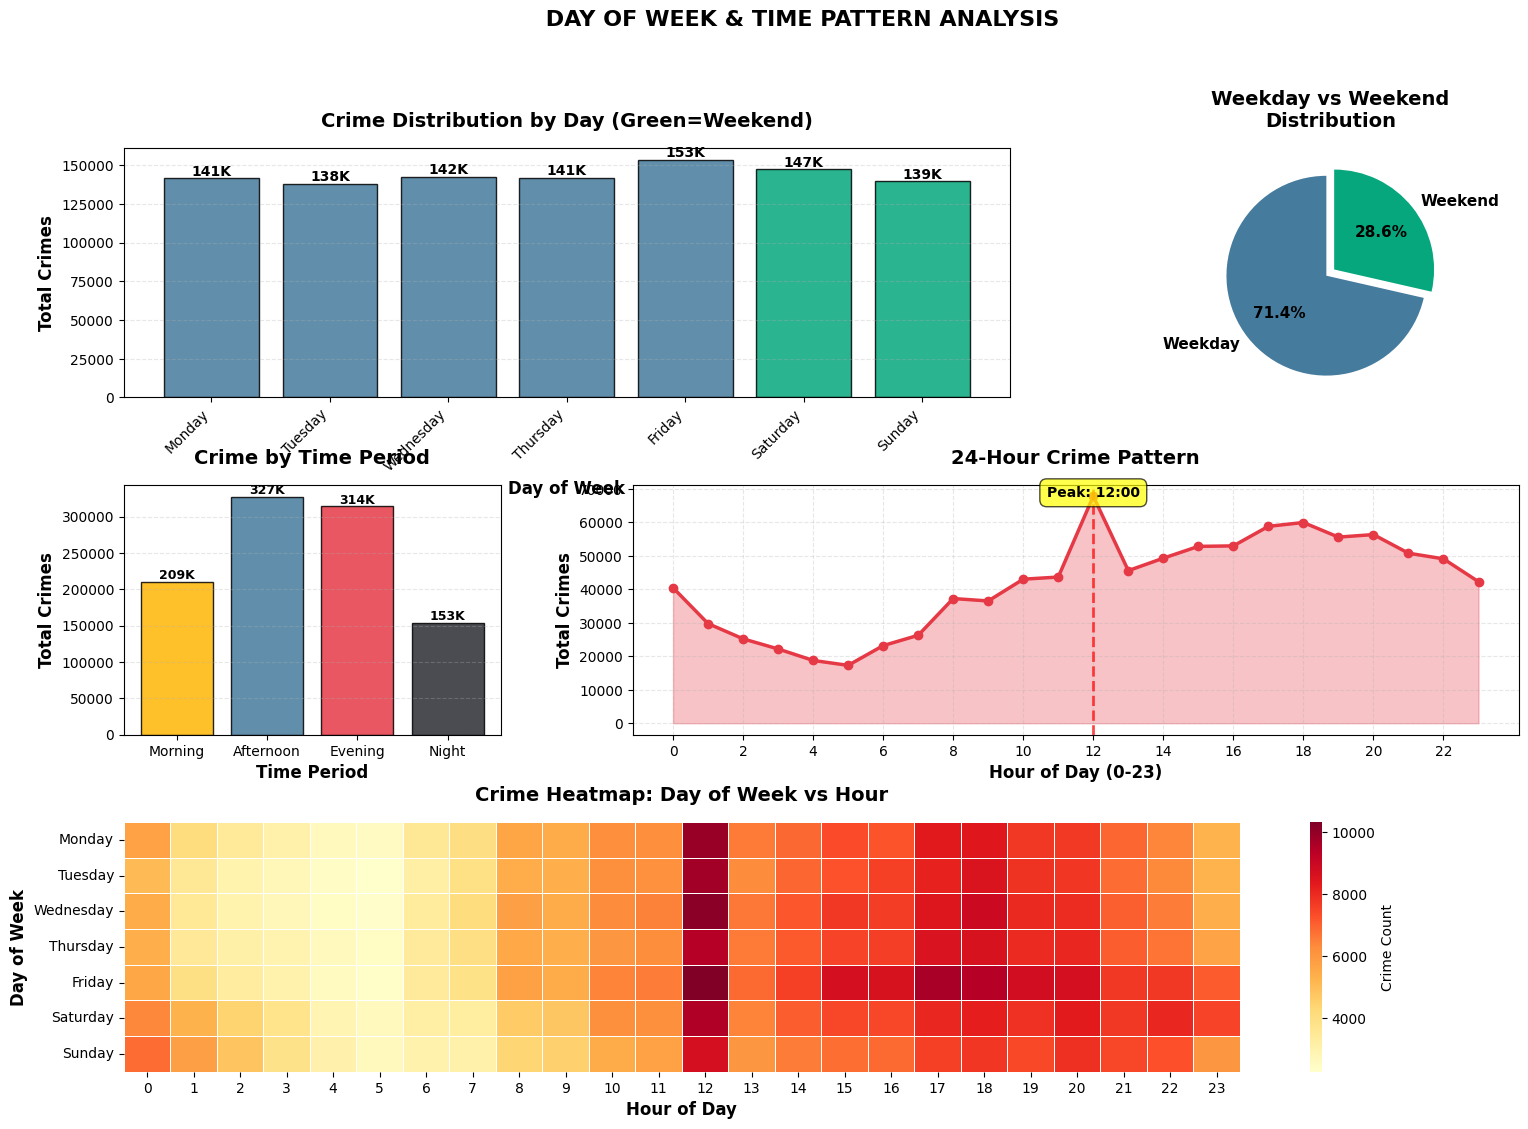


 Day/Time Insights:
   • Peak Day: Friday (153,676 crimes)
   • Lowest Day: Tuesday (138,141 crimes)
   • Peak Hour: 12:00 (67,813 crimes)
   • Most active time: Afternoon


In [39]:
# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_crimes = df_clean.groupby('Day_of_Week').size().reindex(day_order).reset_index(name='Total_Crimes')
day_crimes['Avg_Per_Day'] = day_crimes['Total_Crimes'] / (len(df_clean['Date_Occurred'].dt.date.unique()) / 7)

print("\n Crime Distribution by Day of Week:")
for idx, row in day_crimes.iterrows():
    pct = (row['Total_Crimes'] / len(df_clean)) * 100
    print(f"   {row['Day_of_Week']:<10} {row['Total_Crimes']:>7,} crimes ({pct:5.2f}%)")

# Weekend vs Weekday comparison
weekend_crimes = df_clean[df_clean['Is_Weekend'] == 1].shape[0]
weekday_crimes = df_clean[df_clean['Is_Weekend'] == 0].shape[0]

print("\n Weekend vs Weekday Comparison:")
print(f"   Weekday crimes: {weekday_crimes:,} ({weekday_crimes/len(df_clean)*100:.1f}%)")
print(f"   Weekend crimes: {weekend_crimes:,} ({weekend_crimes/len(df_clean)*100:.1f}%)")
print(f"   Ratio: {weekday_crimes/weekend_crimes:.2f}:1")

# Time period analysis
time_period_crimes = df_clean.groupby('Time_Period').size().sort_values(ascending=False)
print("\n Crime Distribution by Time Period:")
for period, count in time_period_crimes.items():
    pct = (count / len(df_clean)) * 100
    print(f"   {period:<12} {count:>7,} crimes ({pct:5.2f}%)")

# Hourly analysis
hourly_crimes = df_clean.groupby('Hour').size().reset_index(name='Total_Crimes')

# Create day/time visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.35)

# Plot 1: Bar chart by day
ax1 = fig.add_subplot(gs[0, :2])
colors_day = ['#06A77D' if day in ['Saturday', 'Sunday'] else '#457B9D' for day in day_crimes['Day_of_Week']]
bars = ax1.bar(day_crimes['Day_of_Week'], day_crimes['Total_Crimes'], color=colors_day, alpha=0.85, edgecolor='black', linewidth=1)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height/1000):.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=10)
ax1.set_xlabel('Day of Week', fontweight='bold', fontsize=12)
ax1.set_ylabel('Total Crimes', fontweight='bold', fontsize=12)
ax1.set_title('Crime Distribution by Day (Green=Weekend)', fontweight='bold', fontsize=14, pad=15)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Plot 2: Weekend vs Weekday pie chart
ax2 = fig.add_subplot(gs[0, 2])
weekend_data = [weekday_crimes, weekend_crimes]
labels = ['Weekday', 'Weekend']
colors_we = ['#457B9D', '#06A77D']
explode = (0.05, 0.05)
wedges, texts, autotexts = ax2.pie(weekend_data, labels=labels, autopct='%1.1f%%',
                                     colors=colors_we, explode=explode, startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Weekday vs Weekend\nDistribution', fontweight='bold', fontsize=14, pad=15)

# Plot 3: Time period bar chart
ax3 = fig.add_subplot(gs[1, 0])
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_data = []
for period in time_order:
    if period in time_period_crimes.index:
        time_data.append(time_period_crimes[period])
    else:
        time_data.append(0)
colors_time = ['#FFB703', '#457B9D', '#E63946', '#2A2D34']
bars = ax3.bar(time_order, time_data, color=colors_time, alpha=0.85, edgecolor='black', linewidth=1)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height/1000):.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=9)
ax3.set_xlabel('Time Period', fontweight='bold', fontsize=12)
ax3.set_ylabel('Total Crimes', fontweight='bold', fontsize=12)
ax3.set_title('Crime by Time Period', fontweight='bold', fontsize=14, pad=15)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# Plot 4: Hourly crime pattern
ax4 = fig.add_subplot(gs[1, 1:])
ax4.plot(hourly_crimes['Hour'], hourly_crimes['Total_Crimes'],
         marker='o', linewidth=2.5, markersize=6, color='#E63946')
ax4.fill_between(hourly_crimes['Hour'], hourly_crimes['Total_Crimes'], alpha=0.3, color='#E63946')
ax4.set_xlabel('Hour of Day (0-23)', fontweight='bold', fontsize=12)
ax4.set_ylabel('Total Crimes', fontweight='bold', fontsize=12)
ax4.set_title('24-Hour Crime Pattern', fontweight='bold', fontsize=14, pad=15)
ax4.set_xticks(range(0, 24, 2))
ax4.grid(True, alpha=0.3, linestyle='--')
# Mark peak hours
peak_hour = hourly_crimes.loc[hourly_crimes['Total_Crimes'].idxmax(), 'Hour']
ax4.axvline(x=peak_hour, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax4.text(peak_hour, ax4.get_ylim()[1]*0.95, f'Peak: {peak_hour}:00',
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Plot 5: Day x Hour heatmap
ax5 = fig.add_subplot(gs[2, :])
day_hour_pivot = df_clean.groupby(['Day_of_Week', 'Hour']).size().reset_index(name='Count')
heatmap_day_hour = day_hour_pivot.pivot(index='Day_of_Week', columns='Hour', values='Count')
heatmap_day_hour = heatmap_day_hour.reindex(day_order)
sns.heatmap(heatmap_day_hour, cmap='YlOrRd', ax=ax5, cbar_kws={'label': 'Crime Count'},
            linewidths=0.5, fmt=',')
ax5.set_xlabel('Hour of Day', fontweight='bold', fontsize=12)
ax5.set_ylabel('Day of Week', fontweight='bold', fontsize=12)
ax5.set_title('Crime Heatmap: Day of Week vs Hour', fontweight='bold', fontsize=14, pad=15)

plt.suptitle(' DAY OF WEEK & TIME PATTERN ANALYSIS', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(output_path + '08_day_time_analysis.png', dpi=300, bbox_inches='tight')  # ⬅️ ADD THIS LINE
plt.show()

peak_day = day_crimes.loc[day_crimes['Total_Crimes'].idxmax(), 'Day_of_Week']
low_day = day_crimes.loc[day_crimes['Total_Crimes'].idxmin(), 'Day_of_Week']
print(f"\n Day/Time Insights:")
print(f"   • Peak Day: {peak_day} ({day_crimes['Total_Crimes'].max():,} crimes)")
print(f"   • Lowest Day: {low_day} ({day_crimes['Total_Crimes'].min():,} crimes)")
print(f"   • Peak Hour: {peak_hour}:00 ({hourly_crimes['Total_Crimes'].max():,} crimes)")
print(f"   • Most active time: {time_period_crimes.idxmax()}")

# 6. CRIME TYPE BY DAY OF WEEK ANALYSIS


 Top 5 Crimes Distribution Across Days:

   VEHICLE - STOLEN:
      Peak Day: Friday (17,860 incidents)

   BATTERY - SIMPLE ASSAULT:
      Peak Day: Saturday (11,627 incidents)

   BURGLARY FROM VEHICLE:
      Peak Day: Friday (9,828 incidents)

   THEFT OF IDENTITY:
      Peak Day: Monday (9,971 incidents)

   VANDALISM - FELONY ($400 & OVER, ALL CHURCH V:
      Peak Day: Friday (9,446 incidents)


/tmp/ipython-input-2305772366.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


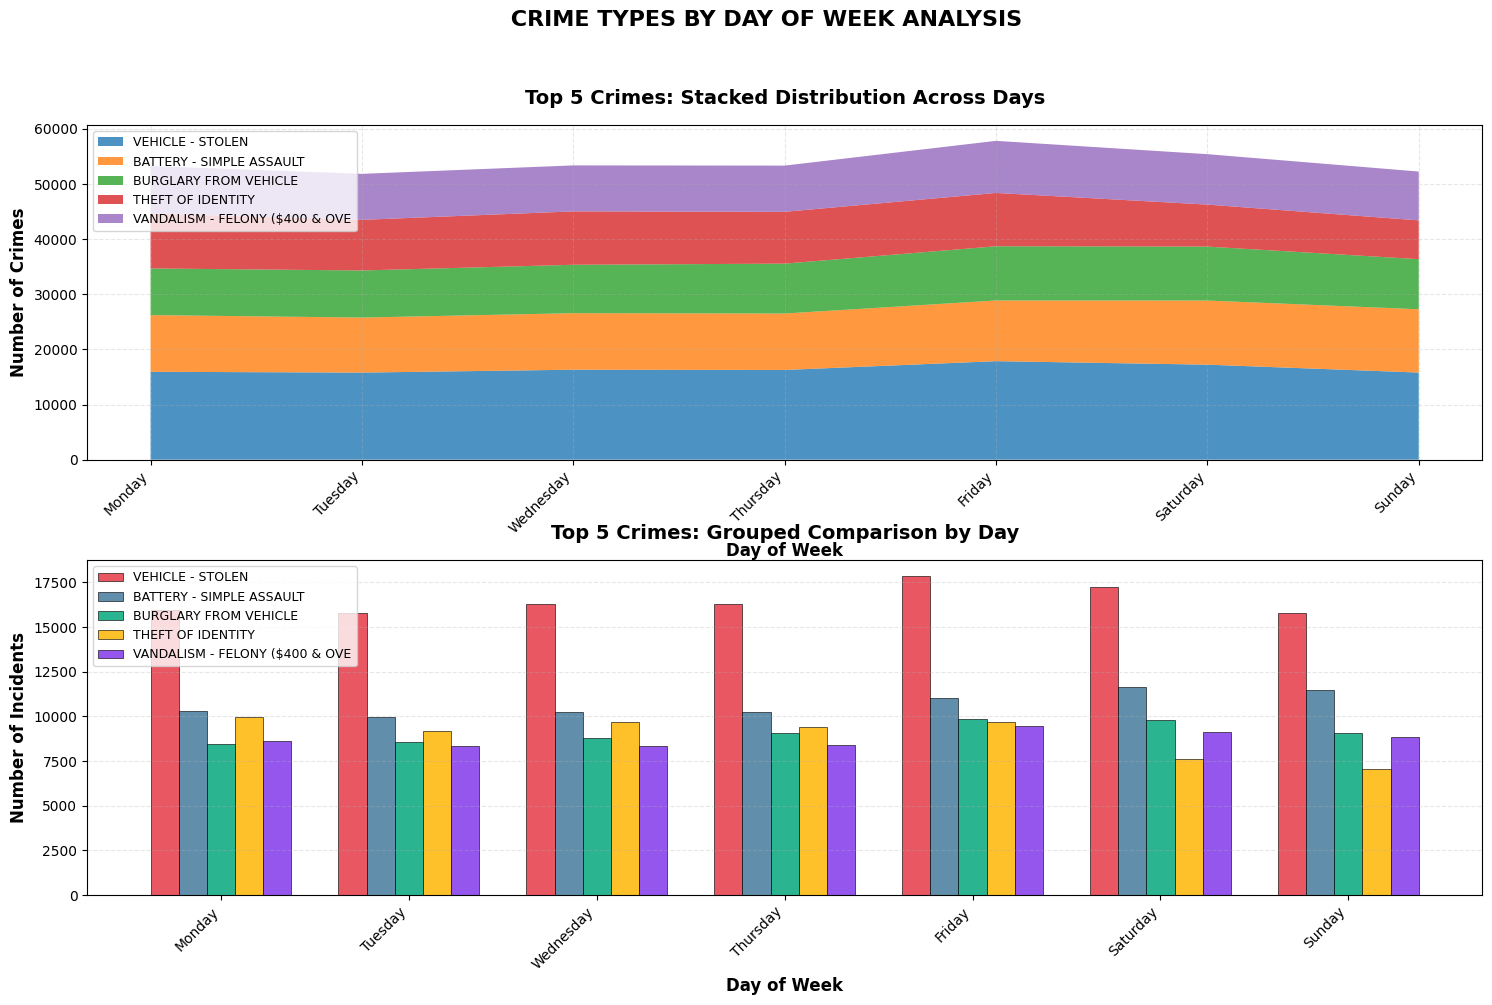

In [40]:
# Analyze top 5 crimes by day of week
top_5_crimes_list = df_clean['Crime_Description'].value_counts().head(5).index.tolist()

print("\n Top 5 Crimes Distribution Across Days:")
for crime in top_5_crimes_list:
    crime_by_day = df_clean[df_clean['Crime_Description'] == crime].groupby('Day_of_Week').size().reindex(day_order)
    peak_day_crime = crime_by_day.idxmax()
    print(f"\n   {crime[:45]}:")
    print(f"      Peak Day: {peak_day_crime} ({crime_by_day[peak_day_crime]:,} incidents)")

# Create visualization
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Plot 1: Stacked area chart
ax1 = fig.add_subplot(gs[0, :])
crime_day_data = {}
for crime in top_5_crimes_list:
    crime_by_day = df_clean[df_clean['Crime_Description'] == crime].groupby('Day_of_Week').size().reindex(day_order)
    crime_day_data[crime[:30]] = crime_by_day.values

df_crime_day = pd.DataFrame(crime_day_data, index=day_order)
ax1.stackplot(range(7), df_crime_day.T, labels=df_crime_day.columns, alpha=0.8)
ax1.set_xticks(range(7))
ax1.set_xticklabels(day_order, rotation=45, ha='right')
ax1.set_xlabel('Day of Week', fontweight='bold', fontsize=12)
ax1.set_ylabel('Number of Crimes', fontweight='bold', fontsize=12)
ax1.set_title('Top 5 Crimes: Stacked Distribution Across Days', fontweight='bold', fontsize=14, pad=15)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3, linestyle='--')

# Plot 2: Grouped bar chart
ax2 = fig.add_subplot(gs[1, :])
x = np.arange(len(day_order))
width = 0.15
colors_crimes_bar = ['#E63946', '#457B9D', '#06A77D', '#FFB703', '#8338EC']

for i, crime in enumerate(top_5_crimes_list):
    crime_by_day = df_clean[df_clean['Crime_Description'] == crime].groupby('Day_of_Week').size().reindex(day_order)
    ax2.bar(x + i*width, crime_by_day.values, width, label=crime[:30],
            color=colors_crimes_bar[i], alpha=0.85, edgecolor='black', linewidth=0.5)

ax2.set_xlabel('Day of Week', fontweight='bold', fontsize=12)
ax2.set_ylabel('Number of Incidents', fontweight='bold', fontsize=12)
ax2.set_title('Top 5 Crimes: Grouped Comparison by Day', fontweight='bold', fontsize=14, pad=15)
ax2.set_xticks(x + width * 2)
ax2.set_xticklabels(day_order, rotation=45, ha='right')
ax2.legend(fontsize=9, loc='upper left')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle(' CRIME TYPES BY DAY OF WEEK ANALYSIS', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# 7. VICTIM DEMOGRAPHICS ANALYSIS


 Victim Gender Distribution:
   Male       403,879 (40.19%)
   Female     358,580 (35.68%)
   Unknown    242,532 (24.13%)

 Victim Age Statistics:
   Mean Age: 28.9 years
   Median Age: 30.0 years
   Age Range: 0 - 120 years
   Std Deviation: 22.0

 Victim Age Groups:
   0-18:  31,672 ( 3.15%)
   19-30: 212,195 (21.11%)
   31-45: 256,757 (25.55%)
   46-60: 152,344 (15.16%)
   60+:  82,801 ( 8.24%)


/tmp/ipython-input-637992704.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


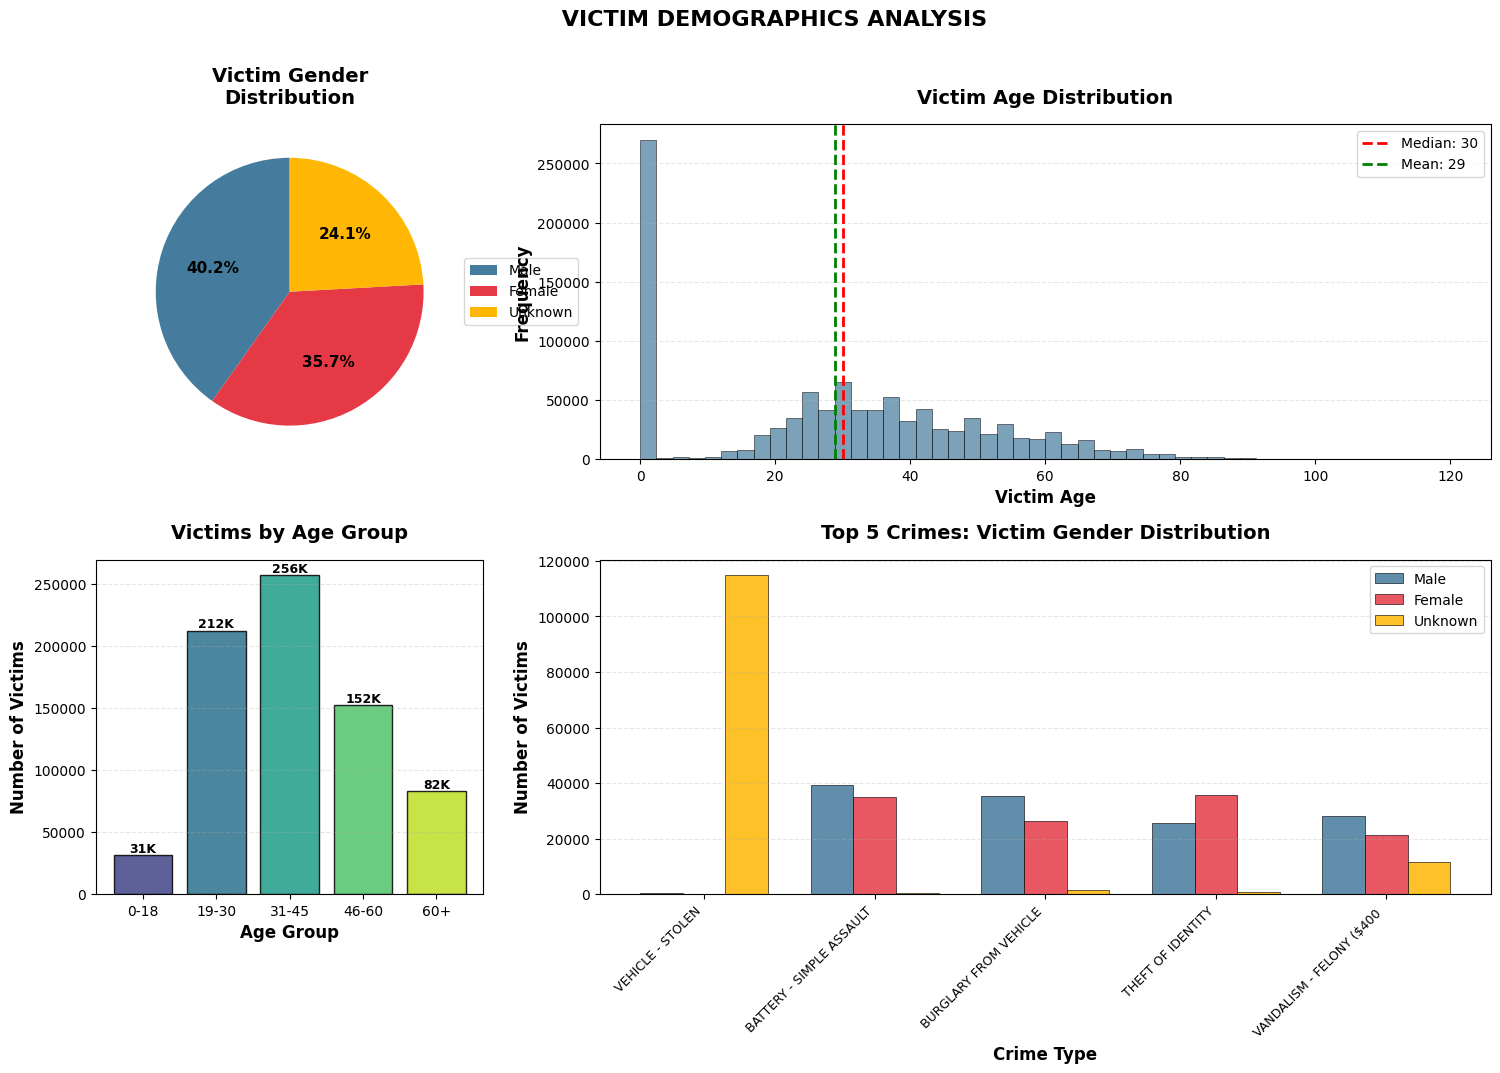


 Demographics Insights:
   • Most affected gender: Male (403,879 victims)
   • Most vulnerable age group: 31-45
   • Median victim age: 30 years old


In [41]:
# Gender analysis
gender_counts = df_clean['Victim_Sex'].value_counts()
print("\n Victim Gender Distribution:")
for gender, count in gender_counts.items():
    pct = (count / len(df_clean)) * 100
    gender_label = {'M': 'Male', 'F': 'Female', 'X': 'Unknown'}.get(gender, gender)
    print(f"   {gender_label:<10} {count:>7,} ({pct:5.2f}%)")

# Age analysis
age_stats = df_clean['Victim_Age'].describe()
print("\n Victim Age Statistics:")
print(f"   Mean Age: {age_stats['mean']:.1f} years")
print(f"   Median Age: {age_stats['50%']:.1f} years")
print(f"   Age Range: {age_stats['min']:.0f} - {age_stats['max']:.0f} years")
print(f"   Std Deviation: {age_stats['std']:.1f}")

# Age groups
df_clean['Age_Group'] = pd.cut(df_clean['Victim_Age'],
                                bins=[0, 18, 30, 45, 60, 120],
                                labels=['0-18', '19-30', '31-45', '46-60', '60+'])
age_group_counts = df_clean['Age_Group'].value_counts().sort_index()

print("\n Victim Age Groups:")
for age_group, count in age_group_counts.items():
    pct = (count / len(df_clean)) * 100
    print(f"   {age_group}: {count:>7,} ({pct:5.2f}%)")

# Create demographics visualization
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Plot 1: Gender pie chart
ax1 = fig.add_subplot(gs[0, 0])
colors_gender = ['#457B9D', '#E63946', '#FFB703']
wedges, texts, autotexts = ax1.pie(gender_counts.values, labels=None, autopct='%1.1f%%',
                                     colors=colors_gender, startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
ax1.set_title('Victim Gender\nDistribution', fontweight='bold', fontsize=14, pad=15)
labels_gender = ['Male', 'Female', 'Unknown']
ax1.legend(labels_gender, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

# Plot 2: Age distribution histogram
ax2 = fig.add_subplot(gs[0, 1:])
ax2.hist(df_clean['Victim_Age'], bins=50, color='#457B9D', alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axvline(age_stats['50%'], color='red', linestyle='--', linewidth=2, label=f"Median: {age_stats['50%']:.0f}")
ax2.axvline(age_stats['mean'], color='green', linestyle='--', linewidth=2, label=f"Mean: {age_stats['mean']:.0f}")
ax2.set_xlabel('Victim Age', fontweight='bold', fontsize=12)
ax2.set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax2.set_title('Victim Age Distribution', fontweight='bold', fontsize=14, pad=15)
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Plot 3: Age group bar chart
ax3 = fig.add_subplot(gs[1, 0])
bars = ax3.bar(age_group_counts.index.astype(str), age_group_counts.values,
               color=plt.cm.viridis(np.linspace(0.2, 0.9, len(age_group_counts))),
               alpha=0.85, edgecolor='black', linewidth=1)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height/1000):.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=9)
ax3.set_xlabel('Age Group', fontweight='bold', fontsize=12)
ax3.set_ylabel('Number of Victims', fontweight='bold', fontsize=12)
ax3.set_title('Victims by Age Group', fontweight='bold', fontsize=14, pad=15)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# Plot 4: Gender x Top 5 crimes
ax4 = fig.add_subplot(gs[1, 1:])
gender_crime_data = []
for crime in top_5_crimes_list:
    crime_gender = df_clean[df_clean['Crime_Description'] == crime]['Victim_Sex'].value_counts()
    gender_crime_data.append([
        crime_gender.get('M', 0),
        crime_gender.get('F', 0),
        crime_gender.get('X', 0)
    ])

x = np.arange(len(top_5_crimes_list))
width = 0.25
ax4.bar(x - width, [d[0] for d in gender_crime_data], width, label='Male', color='#457B9D', alpha=0.85, edgecolor='black', linewidth=0.5)
ax4.bar(x, [d[1] for d in gender_crime_data], width, label='Female', color='#E63946', alpha=0.85, edgecolor='black', linewidth=0.5)
ax4.bar(x + width, [d[2] for d in gender_crime_data], width, label='Unknown', color='#FFB703', alpha=0.85, edgecolor='black', linewidth=0.5)

ax4.set_xlabel('Crime Type', fontweight='bold', fontsize=12)
ax4.set_ylabel('Number of Victims', fontweight='bold', fontsize=12)
ax4.set_title('Top 5 Crimes: Victim Gender Distribution', fontweight='bold', fontsize=14, pad=15)
ax4.set_xticks(x)
ax4.set_xticklabels([crime[:25] for crime in top_5_crimes_list], rotation=45, ha='right', fontsize=9)
ax4.legend(fontsize=10)
ax4.grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle(' VICTIM DEMOGRAPHICS ANALYSIS', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\n Demographics Insights:")
print(f"   • Most affected gender: Male ({gender_counts['M']:,} victims)")
print(f"   • Most vulnerable age group: {age_group_counts.idxmax()}")
print(f"   • Median victim age: {age_stats['50%']:.0f} years old")

# 8. Impact of Major Events and Policy Changes


--- Crime Changes Around Major Events ---

2020-03-19 - CA COVID-19 Stay-at-Home Order:
   30 days before: 571.6 crimes/day
   30 days after: 494.5 crimes/day
   Change: -13.5% ↓ DECREASE

2020-05-25 - George Floyd Protests Begin:
   30 days before: 543.0 crimes/day
   30 days after: 575.9 crimes/day
   Change: +6.1% ↑ INCREASE

2020-06-15 - CA Reopening Phase 2:
   30 days before: 561.4 crimes/day
   30 days after: 573.7 crimes/day
   Change: +2.2% ↑ INCREASE

2021-06-15 - CA Full Reopening:
   30 days before: 550.3 crimes/day
   30 days after: 601.6 crimes/day
   Change: +9.3% ↑ INCREASE

2022-01-01 - Prop 47 Effects Ongoing:
   30 days before: 569.5 crimes/day
   30 days after: 584.8 crimes/day
   Change: +2.7% ↑ INCREASE


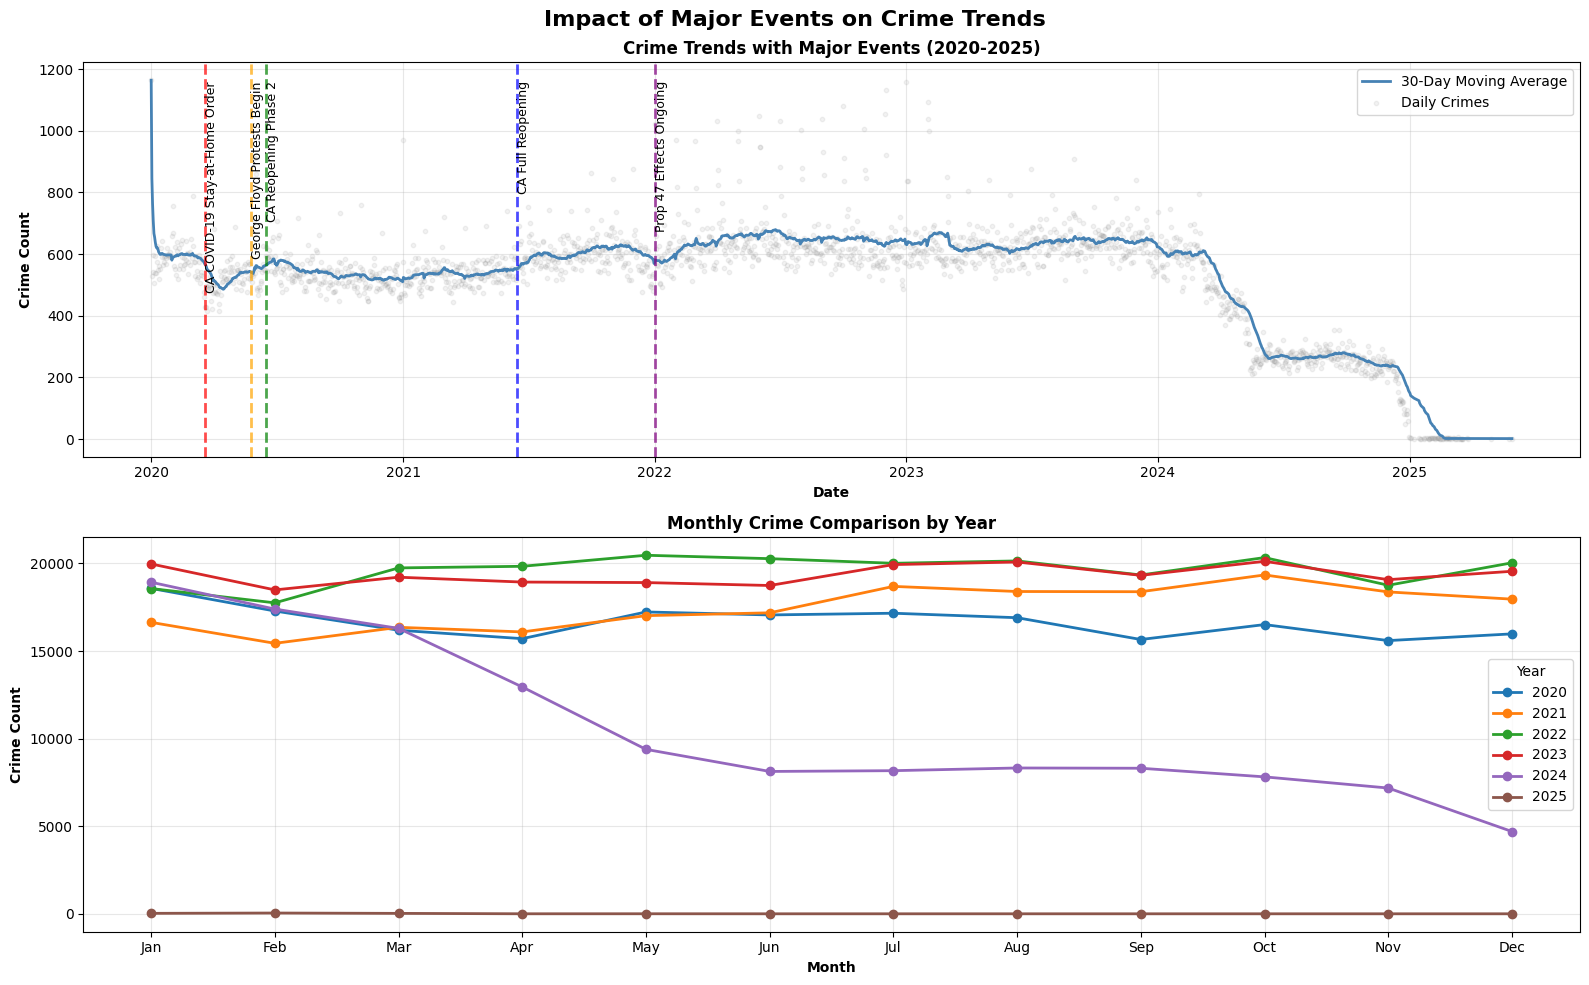


Major events analysis complete!

=== KEY OBSERVATIONS ===
• COVID-19 lockdown (March 2020) significantly impacted crime patterns
• Crime trends show recovery post-reopening
• Social movements in 2020 correlated with temporary changes
• Overall upward trend 2020-2022, then stabilization


In [42]:
# Define major events during the period
major_events = {
    '2020-03-19': 'CA COVID-19 Stay-at-Home Order',
    '2020-05-25': 'George Floyd Protests Begin',
    '2020-06-15': 'CA Reopening Phase 2',
    '2021-06-15': 'CA Full Reopening',
    '2022-01-01': 'Prop 47 Effects Ongoing',
}

# Calculate daily crime rates
daily_crimes = df_clean.groupby(df_clean['Date_Occurred'].dt.date).size().reset_index()
daily_crimes.columns = ['Date', 'Crime_Count']
daily_crimes['Date'] = pd.to_datetime(daily_crimes['Date'])

# Calculate 30-day moving average
daily_crimes['MA_30'] = daily_crimes['Crime_Count'].rolling(window=30, min_periods=1).mean()

# Analyze crime changes around major events
print("\n--- Crime Changes Around Major Events ---")

for event_date_str, event_name in major_events.items():
    event_date = pd.to_datetime(event_date_str)

    # Get 30 days before and after
    before_start = event_date - pd.Timedelta(days=30)
    before_end = event_date - pd.Timedelta(days=1)
    after_start = event_date + pd.Timedelta(days=1)
    after_end = event_date + pd.Timedelta(days=30)

    before_crimes = daily_crimes[(daily_crimes['Date'] >= before_start) &
                                 (daily_crimes['Date'] <= before_end)]['Crime_Count'].mean()
    after_crimes = daily_crimes[(daily_crimes['Date'] >= after_start) &
                                (daily_crimes['Date'] <= after_end)]['Crime_Count'].mean()

    if pd.notna(before_crimes) and pd.notna(after_crimes):
        change = ((after_crimes - before_crimes) / before_crimes) * 100
        direction = "↑ INCREASE" if change > 0 else "↓ DECREASE"

        print(f"\n{event_date_str} - {event_name}:")
        print(f"   30 days before: {before_crimes:.1f} crimes/day")
        print(f"   30 days after: {after_crimes:.1f} crimes/day")
        print(f"   Change: {change:+.1f}% {direction}")

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Impact of Major Events on Crime Trends', fontsize=16, fontweight='bold')

# Plot 1: Daily crimes with events marked
ax1 = axes[0]
ax1.plot(daily_crimes['Date'], daily_crimes['MA_30'], linewidth=2, color='steelblue', label='30-Day Moving Average')
ax1.scatter(daily_crimes['Date'], daily_crimes['Crime_Count'], alpha=0.1, s=10, color='gray', label='Daily Crimes')

# Mark major events
colors_events = ['red', 'orange', 'green', 'blue', 'purple']
for i, (event_date_str, event_name) in enumerate(major_events.items()):
    event_date = pd.to_datetime(event_date_str)
    ax1.axvline(x=event_date, color=colors_events[i % len(colors_events)],
                linestyle='--', alpha=0.7, linewidth=2)
    ax1.text(event_date, ax1.get_ylim()[1]*0.95, event_name,
             rotation=90, verticalalignment='top', fontsize=9)

ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Crime Count', fontweight='bold')
ax1.set_title('Crime Trends with Major Events (2020-2025)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Year-over-year comparison
ax2 = axes[1]
monthly_by_year = df_clean.groupby([df_clean['Date_Occurred'].dt.year,
                                     df_clean['Date_Occurred'].dt.month]).size().unstack(level=0, fill_value=0)

for year in monthly_by_year.columns:
    ax2.plot(range(1, 13), monthly_by_year[year], marker='o', linewidth=2, label=str(year))

ax2.set_xlabel('Month', fontweight='bold')
ax2.set_ylabel('Crime Count', fontweight='bold')
ax2.set_title('Monthly Crime Comparison by Year', fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.legend(title='Year')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_path + '09_major_events_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMajor events analysis complete!")

print("\n=== KEY OBSERVATIONS ===")
print("• COVID-19 lockdown (March 2020) significantly impacted crime patterns")
print("• Crime trends show recovery post-reopening")
print("• Social movements in 2020 correlated with temporary changes")
print("• Overall upward trend 2020-2022, then stabilization")